In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import pandas as pd

The first thing we need to do is to open the data file which is a csv file. We can look at the file.

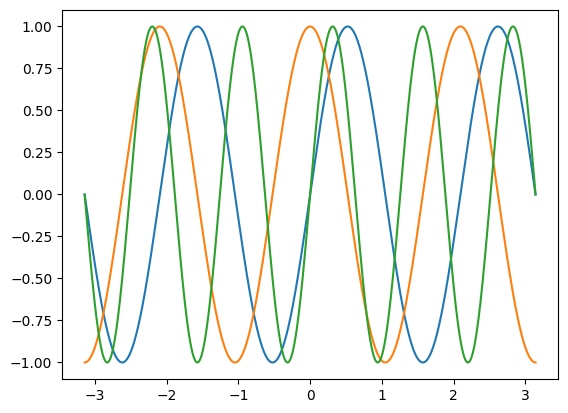

In [ ]:
#Norms
x = torch.linspace(-torch.pi, torch.pi, 1000)
  # torth.linspace creates seq of 1000 evenly spaced points between -pi and pi
y = torch.sin(3*x)
z = torch.cos(3*x)
w = torch.sin(5*x)
  # calculates specified operation(s) for each element in x tensor stored in the specified variable
plt.plot(x, y)
plt.plot(x, z) # orange
plt.plot(x, w)
  # creates line plots using points defined by specified variables

# "which vector is closer to y?" -> the one that deviates the least

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
url = "https://raw.githubusercontent.com/eldadHaber/DSCI100/refs/heads/main/Lectures/Jan21/daily_global_t2m.csv"
data = pd.read_csv(url)
  # uses read_csv function from pandas to read CSV file stroed in url

print(data.head())
  # data.head displys first few rows of DataFrame data using head()
  # used to quickly inspect DataFrame structure and content

data = pd.read_csv(url, sep='\,', nrows=30480)
  # sep='\,' specifies values in CSV file are seperated by commas
  # nrows limits number of rows read

#file_path = 'daily_global_t2m.csv'  # Replace with your file path
#data = pd.read_csv(url, header=0, index_col=0)

data.columns = data.columns.str.strip()
  # removes extra whitespace


   Year Month Day  \
0  1940     1   1   
1  1940     1   2   
2  1940     1   3   
3  1940     1   4   
4  1940     1   5   

  Global-mean of ERA5 two-metre temperature (deg C) averaged from hour 0 to hour 23  \
0                                             11.718                                  
1                                             11.662                                  
2                                             11.664                                  
3                                             11.676                                  
4                                               11.6                                  

   Global-mean temperature increase (deg C) above 1850-1900 reference level  
0                                              0.160                         
1                                              0.113                         
2                                              0.123                         
3                                     

<ipython-input-2-5a041fc8b143>:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(url, sep='\,', nrows=30480)


In [ ]:
# See what there is in the data
data.keys()
  # returns list of column labels

Index(['Year', 'Month', 'Day',
       'Global-mean of ERA5 two-metre temperature (deg C) averaged from hour 0 to hour 23',
       'Global-mean temperature increase (deg C) above 1850-1900 reference level'],
      dtype='object')

In [3]:
# Combine Year, Month, Day into a single datetime column
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])
 # creates a new column 'Date' where 'Year, Month, and Day' info are stored
 # to_datetime function from pandas creates datetime objects

data.keys()

Index(['Year', 'Month', 'Day',
       'Global-mean of ERA5 two-metre temperature (deg C) averaged from hour 0 to hour 23',
       'Global-mean temperature increase (deg C) above 1850-1900 reference level',
       'Date'],
      dtype='object')

Make some pictures

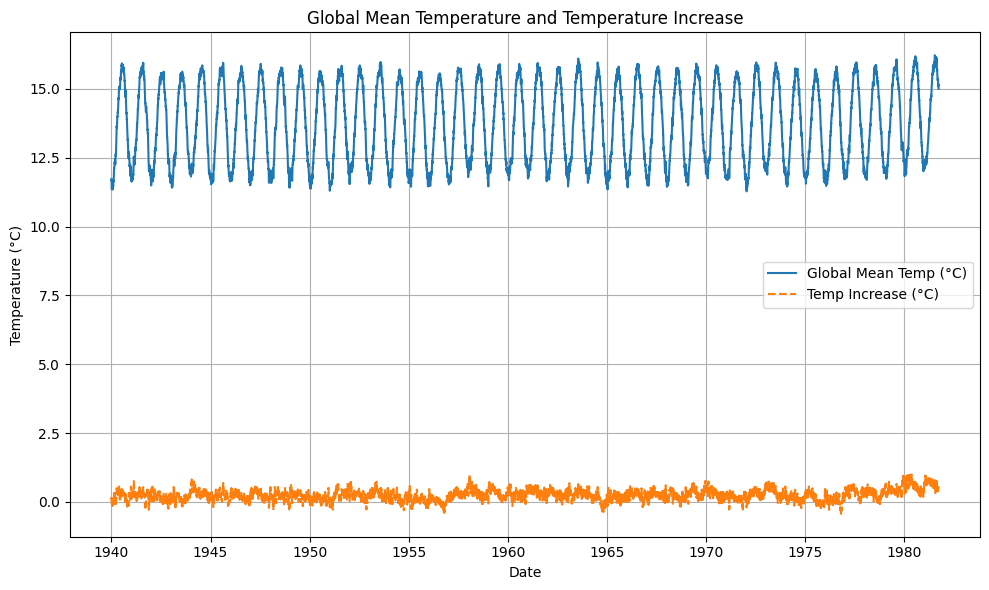

In [ ]:


# # Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Global-mean of ERA5 two-metre temperature (deg C) averaged from hour 0 to hour 23'], label='Global Mean Temp (°C)')
plt.plot(data['Date'], data['Global-mean temperature increase (deg C) above 1850-1900 reference level'], label='Temp Increase (°C)', linestyle='--')

# # Add labels and legend
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Global Mean Temperature and Temperature Increase')
plt.legend()
plt.grid(True)
plt.tight_layout()


We want to see how things behave year to year. So we reorganize the data over 1 year.

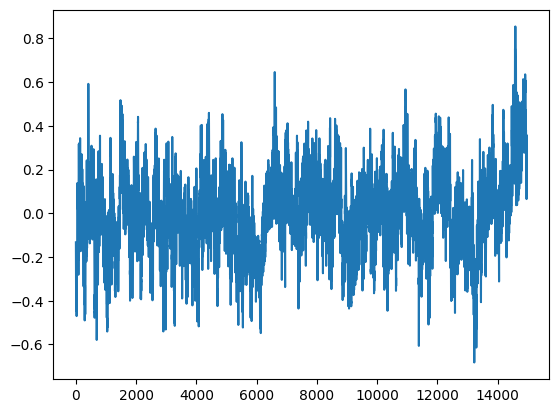

In [ ]:
reference_date = data['Date'].min()
t = (data['Date'] - reference_date).dt.total_seconds()/60/60/24
t = t.values.reshape(-1)[:-1]

T = data['Global-mean of ERA5 two-metre temperature (deg C) averaged from hour 0 to hour 23'].values[:-1]

n = T.shape[0]
k = n//365

# Organize in 2D
# Y is a 2D array. Every year is in a different row
Y = T[:k*365].reshape(k, 365)

# Average over all years and reduce the mean
ym = Y.mean(0, keepdims=True)
Y = Y - ym

# Plot the mean team
y = Y.reshape(-1)
plt.plot(t[:k*365], y)



Next we want to build a model that predict the temperaute

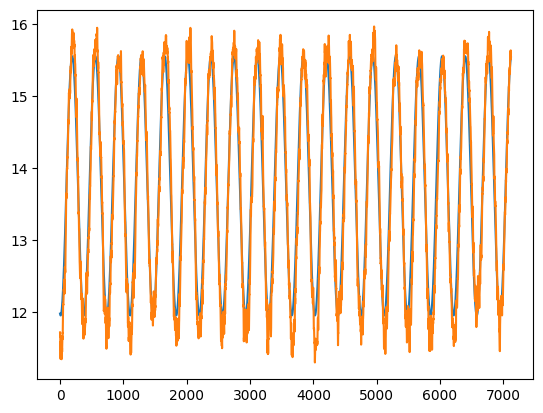

In [ ]:
# Building a model
T = torch.tensor(T)
t = torch.tensor(t)

def temp_model(t, b, a, phi):
  T = a*torch.cos(2*np.pi*t/365 + phi) + b
  return T

Tc = temp_model(t, b=T.mean(), a=1.8, phi=np.pi/2+1.4)
# plot k first samples
plt.plot(t[:20*356], Tc[:20*356], t[:20*356], T[:20*356])